﻿[Chorus]
Sing every hour (Every hour, 'til the power)
Every minute (Every minute, of the Lord)
Every second (Every second, comes)
Sing each and every millisecond (Down)
We need you (We need you, sing 'til the power)
We need you (We need you, of the Lord)
We need you (Comes)
Oh, we need you (Down)


[Verse]
Sing 'til the power of the Lord comes down
Sing 'til the power of the Lord comes down
Sing 'til the power of the Lord comes down (Let everything that have breath praise God)
Sing 'til the pow
Total words: 72030
Unique words: 5762
Number of unique words that represent half the corpus: 63
    word  frequency
0      i       3560
1    the       2445
2    you       2033
3     to       1248
4    and       1228
5      a       1170
6     it       1116
7      t       1043
8   that        950
9      s        907
10    my        892
11    me        810
12    in        750
13    we        691
14     m        688
15    on        578
16   all        566
17    up        505
18  like        502
19 

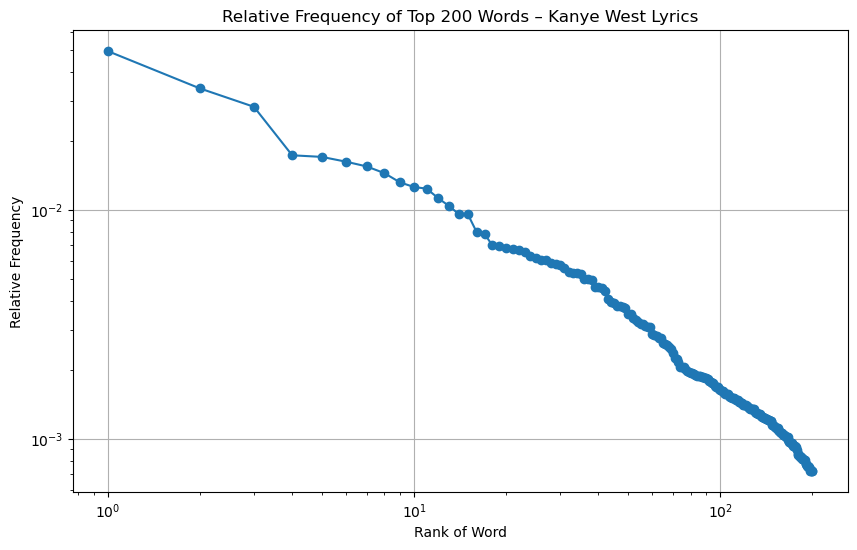

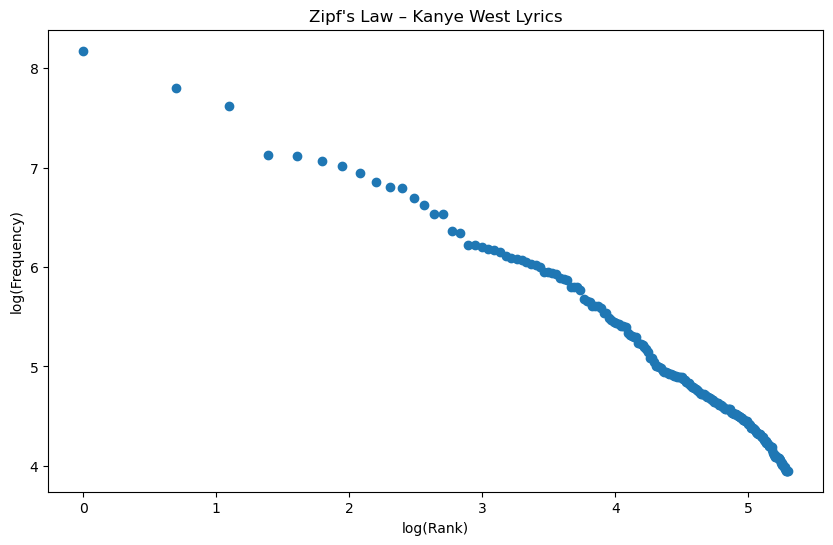


Interpretation:
The distribution approximately follows Zipf's Law, the most common words occur far more often than rare ones.
Kanye West's lyrics show high frequency of personal pronouns, slang, and repetition typical of rap lyrics.
Compared to general English, there are fewer unique words and stronger thematic repetition.


In [7]:
# [Dataset Source – Kanye West Lyrics (Kaggle)](https://www.kaggle.com/datasets/convolutionalnn/kanye-west-lyrics-dataset?utm_source=chatgpt.com)

# --- Step 1: Import Libraries ---
# - pandas for reading and handling the dataset
# - re for regular expressions to clean and tokenize words
# - collections.Counter to count word frequencies
# - matplotlib and numpy for plotting and numeric operations
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# --- Step 2: Load txt file ---
# The dataset comes from Kaggle: https://www.kaggle.com/datasets/convolutionalnn/kanye-west-lyrics-dataset
# It contains lyrics from Kanye West's discography, with each row corresponding to a song or lyric segment.
# I loaded it into a pandas DataFrame and inspect the first few rows.

file_path = r"C:\Users\hotga\Documents\Data 620\week8_assignment\Kanye_West_Lyrics.txt"

# Open and read the entire text file as one string
with open(file_path, 'r', encoding='utf-8') as f:
    corpus = f.read()

# preview the first few lines
print(corpus[:500])

# --- Step 3: Clean and Tokenize ---
# To ensure consistency:
# - convert all text to lowercase
# - remove punctuation and non-alphabetic characters
# - split the text into individual words 
# Here, I define “unique words” as distinct lowercase alphabetic tokens.
words = re.findall(r'\b[a-z]+\b', corpus.lower())
total_words = len(words)
unique_words = set(words)

print(f"Total words: {total_words}")
print(f"Unique words: {len(unique_words)}")

# --- Step 4: Frequency Distribution ---
# Using Counter, I counted the frequency of each word in the corpus.
# I then determine how many unique words account for half of all word occurrences.
counts = Counter(words)
most_common = counts.most_common(200)

# Calculate the number of unique words that make up half of the total word count
cumulative = 0
unique_for_half = 0
for word, freq in counts.most_common():
    cumulative += freq
    unique_for_half += 1
    if cumulative >= total_words / 2:
        break
print(f"Number of unique words that represent half the corpus: {unique_for_half}")

# --- Step 5: Display Top 200 Words ---
# I displayed the 200 most frequent words and their counts.
# This provides insight into which words dominate Kanye's lyrics.
top_words_df = pd.DataFrame(most_common, columns=['word', 'frequency'])
print(top_words_df.head(20))

# --- Step 6: Plot Relative Frequency of Top 200 Words ---
# Here I visualized how the relative frequency of the top 200 words declines as rank increases.
# I used a log-log scale to clearly show the steep drop-off in word frequency.
ranks = np.arange(1, 201)
freqs = [count for _, count in most_common]
rel_freqs = np.array(freqs) / sum(counts.values())

plt.figure(figsize=(10,6))
plt.plot(ranks, rel_freqs, marker='o')
plt.title('Relative Frequency of Top 200 Words – Kanye West Lyrics')
plt.xlabel('Rank of Word')
plt.ylabel('Relative Frequency')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

# --- Step 7: Zipf's Law Plot ---
# Zipf’s Law predicts that the frequency of a word is inversely proportional to its rank.
# To test this, I plotted log(rank) vs log(frequency). If the data roughly forms a straight line with a slope near -1,
# it supports Zipf's Law.
plt.figure(figsize=(10,6))
plt.plot(np.log(ranks), np.log(freqs), 'o')
plt.title("Zipf's Law – Kanye West Lyrics")
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.show()


print("\nInterpretation:")
print("The distribution approximately follows Zipf's Law, the most common words occur far more often than rare ones.")
print("Kanye West's lyrics show high frequency of personal pronouns, slang, and repetition typical of rap lyrics.")
print("Compared to general English, there are fewer unique words and stronger thematic repetition.")
